In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")

train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

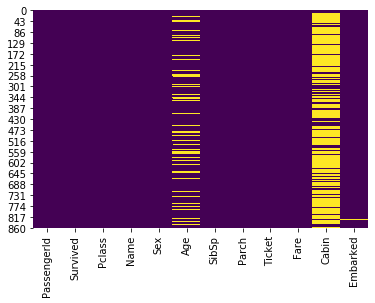

In [4]:
sns.heatmap(train_data.isnull(),cbar=False,cmap="viridis")

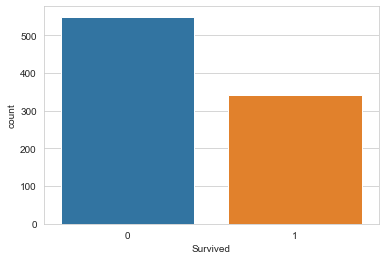

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Survived",data=train_data)

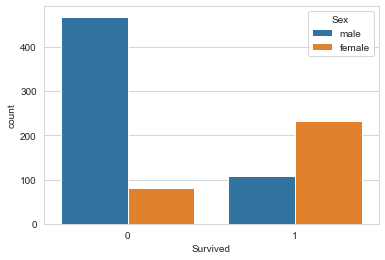

In [6]:
sns.countplot(x="Survived",hue="Sex",data=train_data)

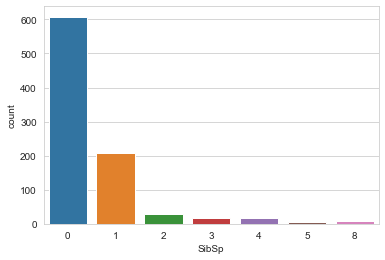

In [7]:
sns.countplot(x="SibSp",data=train_data)

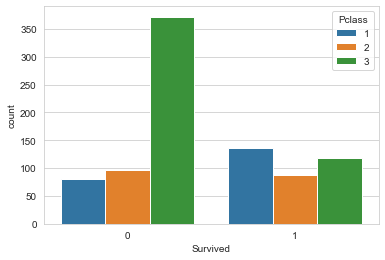

In [8]:
sns.countplot(x="Survived",hue="Pclass",data=train_data)

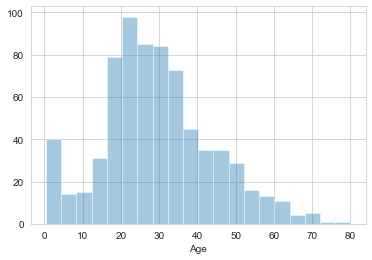

In [9]:
sns.distplot(train_data['Age'].dropna(),kde=False)

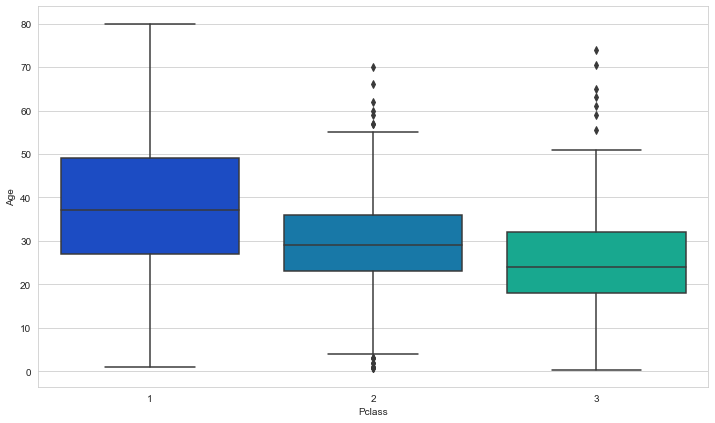

In [10]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train_data,palette="winter")

In [11]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37;
        
        elif Pclass == 2:
            return 29;
        
        elif Pclass == 3:
            return 24;
    else:
        return Age;

In [12]:
train_data['Age'] = train_data[['Age','Pclass']].apply(impute_age,axis=1)

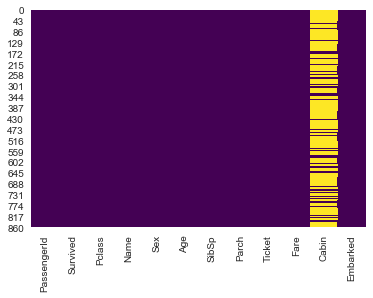

In [13]:
sns.heatmap(train_data.isnull(),cbar=False,cmap="viridis")

In [14]:
train_data.drop('Cabin',axis=1,inplace=True)

In [15]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


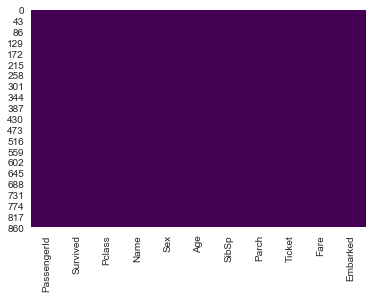

In [16]:
sns.heatmap(train_data.isnull(),cbar=False,cmap="viridis")

In [17]:
pd.get_dummies(train_data['Sex'],drop_first=True).head()

,male
0,1
1,0
2,0
3,0
4,1


In [18]:
sex=pd.get_dummies(train_data['Sex'],drop_first=True)
embarked=pd.get_dummies(train_data['Embarked'],drop_first=True)

In [19]:
train_data.drop(['Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [21]:
train_data = pd.concat([train_data,sex,embarked],axis=1)

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


Great Our data is ready for model

## Bulding Logistic Regression Model

Let's start the data by spliting into test and train set

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(train_data.drop('Survived',axis=1),train_data['Survived'],
                                                test_size=0.40,random_state=101)

In [25]:
X_train.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
124,125,1,54.0,0,1,77.2875,1,0,1
745,746,1,70.0,1,1,71.0000,1,0,1
653,654,3,24.0,0,0,7.8292,0,1,0
272,273,2,41.0,0,1,19.5000,0,0,1
868,869,3,24.0,0,0,9.5000,1,0,1


In [26]:
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,332,1,45.5,0,0,28.500,1,0,1
700,701,1,18.0,1,0,227.525,0,0,0
748,749,1,19.0,1,0,53.100,1,0,1
751,752,3,6.0,0,1,12.475,1,0,1
481,482,2,29.0,0,0,0.000,1,0,1


In [27]:
y_train.head()

124    0
745    0
653    1
272    1
868    0
Name: Survived, dtype: int64

In [28]:
y_test.head()

331    0
700    1
748    0
751    1
481    0
Name: Survived, dtype: int64

## Training and Prediction 

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
logmodal = LogisticRegression()
logmodal.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predections = logmodal.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
accuracy = confusion_matrix(y_test,predections)

accuracy

array([[185,  22],
       [ 50, 100]])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_percentage = ( accuracy_score(y_test,predections) * 100 )

round(accuracy_percentage,2)

79.83

In [36]:
predections

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [37]:
output = pd.DataFrame({'Id': X_test.PassengerId,'Survived': predections})
output.to_csv('submission.csv', index=False)

## Test Data

In [38]:
test_data = pd.read_csv("test.csv")
feature_coulmns = ['PassengerId','Pclass','Age','SibSp','Parch','Fare']

In [39]:
sex=pd.get_dummies(test_data['Sex'],drop_first=True)
embarked=pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data_X = pd.concat([test_data[feature_coulmns],sex,embarked],axis=1)

In [40]:
test_data_X['Age'] = test_data_X[['Age','Pclass']].apply(impute_age,axis=1)
test_data_X = test_data_X[test_data_X['Fare'].notnull()]

In [41]:
test_data_X.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [42]:
logmodal = LogisticRegression()
logmodal.fit(X_train,y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
predections_test = logmodal.predict(test_data_X)

In [44]:
output = pd.DataFrame({'Id': test_data_X.PassengerId,'Survived': predections_test})
output.to_csv('submission.csv', index=False)